# Programming Assignment 4: Image Classification using Bag_of_Features

## Setup

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/'My Drive'/CMI/sem-4/CV/CV_Programming_Assignment4/code

[Errno 2] No such file or directory: 'drive/My Drive/CMI/sem-4/CV/CV_Programming_Assignment4/code'
/content/drive/My Drive/CMI/sem-4/CV/CV_Programming_Assignment4/code


In [0]:
ls

 Bag_of_Features_code.py          PA4_utils.py            vocab_100.pkl
'Copy of ProgAssignment4.ipynb'   ProgAssignment4.ipynb   vocab_200.pkl
 __init__.py                      __pycache__/            vocab_500.pkl


In [0]:
pip install  opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6MB 162kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [0]:
# Set up parameters, image paths and category list
#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import os.path as osp
import pickle
from random import shuffle
import matplotlib.pyplot as plt
from PA4_utils import *
import Bag_of_Features_code as bfc


# This is the list of categories / directories to use. The categories are
# somewhat sorted by similarity so that the confusion matrix looks more
# structured (indoor and then urban and then rural).
categories = ['airplanes', 'helicopter','car_side', 'Motorbikes','grand_piano',  
              'sunflower','umbrella','butterfly'];
### In the data folder, motorbike image foler is named "Motorbikes". Hence this names was changed
### in above categories list from "motorbike" to "Motorbikes"

# This list of shortened category names is used later for visualization
### The list abbr_categories is changed from the one given since it's elements
### were not in order with categories list.
#abbr_categories = ['Apl', 'Bfy', 'Car', 'Pno', 'Hel', 'Mbk', 'Sfl', 'Umb'];
abbr_categories = ['Apl', 'Hel','Car','Mbk','Pno','Sfl','Umb','Bfy']

# Number of training examples per category to use. Max is 100. 
num_train_per_cat = 100

# This function returns lists containing the file path for each train
# and test image, as well as lists with the label of each train and
# test image. By default all four of these lists will have 800 elements
# where each element is a string.
data_path = osp.join('..', 'data')
train_image_paths, test_image_paths, train_labels, test_labels = get_image_paths(data_path,
                                                                                 categories,
                                                                                 num_train_per_cat);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Bag of SIFT features with Nearest Neighbor classifier

### Represent each image with the Bag of SIFT feature

To create a new vocabulary, make sure `vocab_filename` is different than the old vocabulary, or delete the old one.

In [0]:
print('Using the BAG-OF-SIFT representation for images')

vocab_filename = 'vocab_100.pkl'
if not osp.isfile(vocab_filename):
    # Construct the vocabulary
    print('No existing visual word vocabulary found. Computing one from training images')
    vocab_size = 100  # Larger values will work better (to a point) but be slower to compute
    vocab = bfc.build_vocabulary(train_image_paths, vocab_size, which_descriptor='surf')
    with open(vocab_filename, 'wb') as f:
        pickle.dump(vocab, f)
        print('{:s} saved'.format(vocab_filename))

train_image_feats = bfc.get_bags_of_sifts(train_image_paths, vocab_filename, which_descriptor='surf')
test_image_feats = bfc.get_bags_of_sifts(test_image_paths, vocab_filename, which_descriptor='surf')

Using the BAG-OF-SIFT representation for images


Following are the best accuracy results for both KNN and SVM recognition systems. This is followed by different experiments performed.

### Classify each test image by training and using the Nearest Neighbor classifier

In [0]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, 
                                                     metric='euclidean',n_neighbors=7)

Using NEAREST NEIGHBOR classifier to predict test set categories


###  Build a confusion matrix and score the recognition system

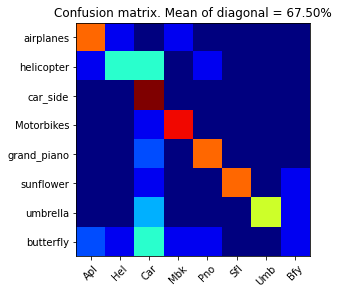

In [0]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Bag of SIFT features and SVM classifier
We will reuse the bag of SIFT features from before.

The difference is that this time we will classify them with a support vector machine (SVM).

### Classify each test image by training and using the SVM classifiers

In [0]:
print('Using SVM classifier to predict test set categories')
predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats, C=40)

Using SVM classifier to predict test set categories


### Build a confusion matrix and score the recognition system

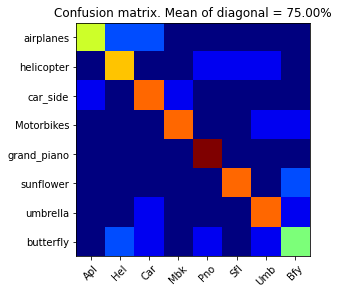

In [0]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Show interest points on one image from any 3 categories


(<matplotlib.axes._subplots.AxesSubplot at 0x7f23defae588>,
 Text(0.5, 1.0, 'Motorbike'))

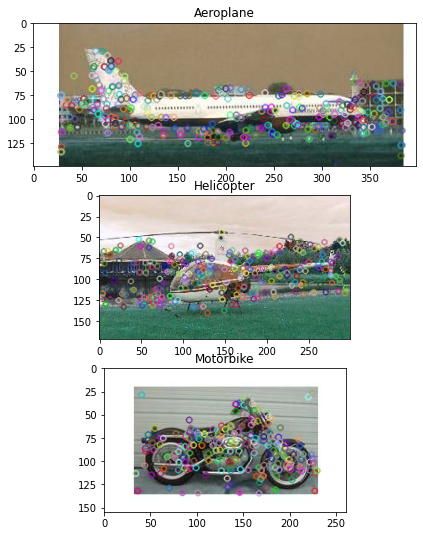

In [0]:
img1 = cv2.imread(train_image_paths[0])
surf = cv2.xfeatures2d.SIFT_create()
kp1, _ = surf.detectAndCompute(img1,None)
imgkp1 = cv2.drawKeypoints(img1,kp1,None)

img2 = cv2.imread(train_image_paths[100])
surf = cv2.xfeatures2d.SIFT_create()
kp2, _ = surf.detectAndCompute(img2,None)
imgkp2 = cv2.drawKeypoints(img2,kp2,None)

img3 = cv2.imread(train_image_paths[200])
surf = cv2.xfeatures2d.SIFT_create()
kp3, _ = surf.detectAndCompute(img3,None)
imgkp3 = cv2.drawKeypoints(img3,kp3,None)

fig = plt.gcf()
fig.set_size_inches(9,9)
plt.subplot(3,1,1),plt.imshow(imgkp1),plt.title('Aeroplane')
plt.subplot(3,1,2),plt.imshow(imgkp2),plt.title('Helicopter')
plt.subplot(3,1,3),plt.imshow(imgkp3),plt.title('Motorbike')

## Results

### KNN
Experimenting with different values of K and metric<br><br>
- K=1, metric='euclidean' --> 61.25%
- K=7, metric='euclidean' --> 67.50%
- K=1, metric='chi2'      --> 61.25%
- K=7, metric='chi2'      --> 66.25%

In [0]:
euclidean_1_predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, 
                                                     metric='euclidean',n_neighbors=1)
euclidean_7_predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, 
                                                     metric='euclidean',n_neighbors=7)
chisq_1_predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, 
                                                     metric='chi2',n_neighbors=1)
chisq_7_predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, 
                                                     metric='chi2',n_neighbors=7)

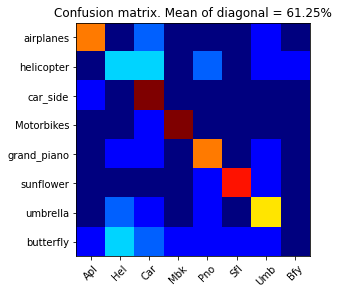

In [0]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             euclidean_1_predicted_categories)

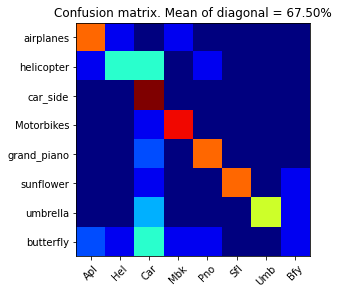

In [0]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             euclidean_7_predicted_categories)

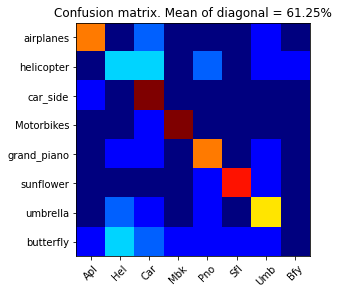

In [0]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             chisq_1_predicted_categories)

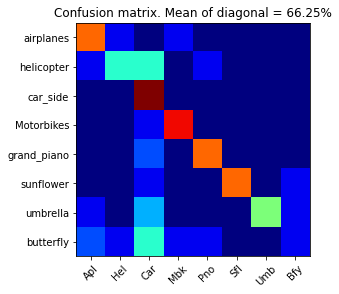

In [0]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             chisq_7_predicted_categories)

### SVM
Varying values of C --> corresponding accuracy
- C = 40 --> 75.00%
- C = 1 --> 66.25%
- C = 0.1 --> 62.50%

C is the parameter that decides extent of regularization.

In [0]:
c_1_predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats, C=1)
c_0_1_predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats, C=0.1)
c_40_predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats, C=40)

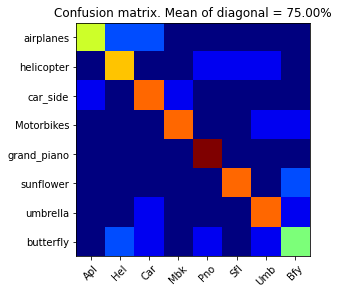

In [0]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             c_40_predicted_categories)

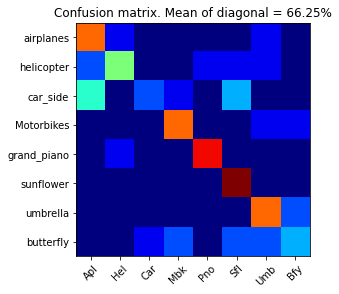

In [0]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             c_1_predicted_categories)

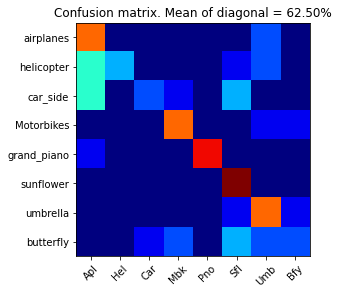

In [0]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             c_0_1_predicted_categories)